In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [7]:
# Importing the dataset.
df = pd.read_excel('admission_and_cgpa.xlsx')
#X,Y = df[:,0], df[:,1]

In [8]:
df.head()

,CGPA(out of 10),Chance of getting admission
0,9.65,0.92
1,8.87,0.76
2,8.00,0.72
3,8.67,0.80
4,8.21,0.65


In [19]:
#assigns CGPA to X and Chance of getting admission to Y
X, Y = df['CGPA(out of 10)'], df['Chance of getting admission']

Text(0.5, 1.0, 'CGPA against Chance of Admission')

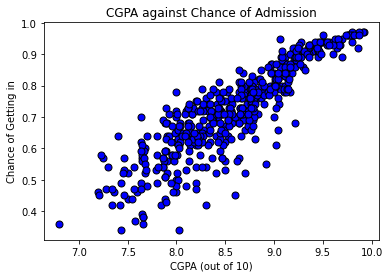

In [13]:
# Plotting the dataset.
plt.plot(X,Y,"bo",ms=7,mec="k")
plt.ylabel("Chance of Getting in")
plt.xlabel("CGPA (out of 10)")
plt.title("CGPA against Chance of Admission")

### Learn the parameters
In this part, you will fit the linear regression parameters $\theta_0$ and $\theta_1$ to the admission dataset.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\hat {y}^{(i)} - y^{(i)}\right)^2$$ 

where the hypothesis $\hat {y}^{(i)}$ is the predicted value for a given x and is given by the linear model and $m$ is the total number of datapoints
$$ \hat {y} =  h_\theta(x) = \theta_0 + \theta_1 x$$ 

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)x^{(i)}$$

With each step of gradient descent, your parameters $\theta_0$ and $\theta_1$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.


In [15]:
# hypothesis function 
def h_x(x,theta0,theta1):
    # YOUR CODE HERE #
    temp = theta0 + (theta1*x)
    return temp

# cost function
def cost_func(X,Y,theta0,theta1):
    # YOUR CODE HERE #
    prediction = h_x(X,theta0,theta1)
    diff = ((prediction) - Y)
    diff_squared = ((prediction) - Y)**2                 
    J = 1/2 * np.sum(diff_squared)
    return J
    
        
def gradient_descent(X,Y,alpha,epochs):
    # YOUR CODE HERE #
    J = list() # At each iteration/epoch, append your calculated loss in this list
    
    # Initializing the thetas/weights with 1:
    theta0 = 1 
    theta1 = 1
    
    for i in range(epochs):
        theta0_curr = theta0 - (alpha* np.sum((h_x(X,theta0,theta1)-Y)))/len(X)
        theta1_curr = theta1 - (alpha* np.sum((h_x(X,theta0,theta1)-Y)*X))/len(X)
        
        theta0 = theta0_curr
        theta1 = theta1_curr 
        J.append(cost_func(X,Y,theta0,theta1))
        
    return theta0 , theta1 , J

In [16]:
n_epoch = 50000 # Modify as per your model (should be in the range of 1000 - 3000)
alpha = 0.015 # Modify as per your model (should be in the range of 0.001 - 0.1)

theta0, theta1, J = gradient_descent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))

Predicted theta0 = -0.9945, theta1 = 0.2001, cost = 1.1032


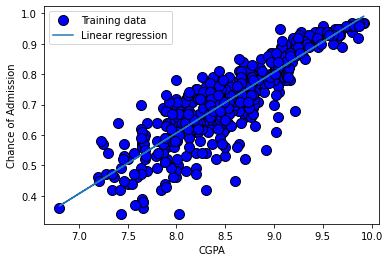

In [21]:
y_pred_list = list()
for x in X:
    y_pred_list.append(h_x(x, theta0, theta1))
    
plt.plot(X, Y, 'bo', ms=10, mec='k')
plt.ylabel('Chance of Admission')
plt.xlabel('CGPA')
plt.plot(X, y_pred_list, '-')
plt.legend(['Training data', 'Linear regression'])

In [23]:
# finds chance of getting in through the trained model
cgpa = 7.6
h_x(cgpa,theta0, theta1)

0.5265570587869068